In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


CDC ILI Activity for  Oklahoma


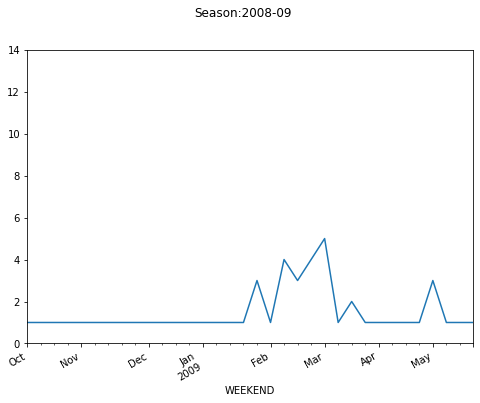

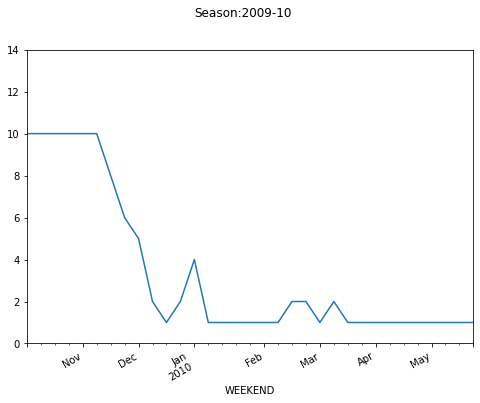

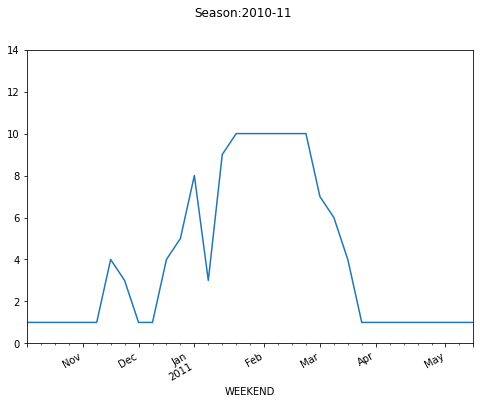

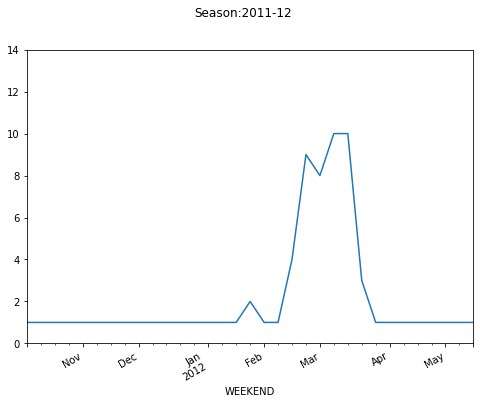

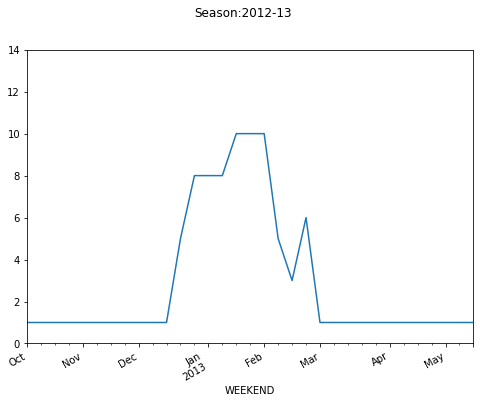

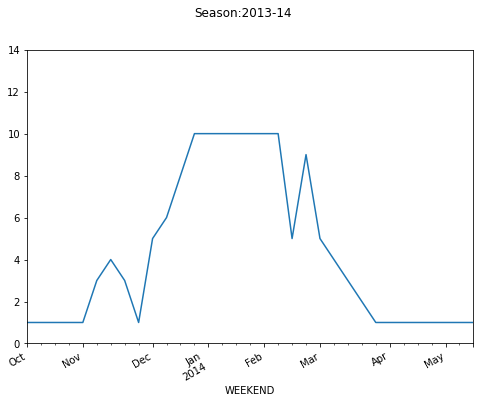

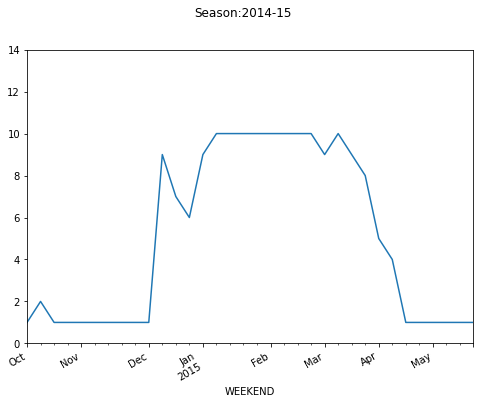

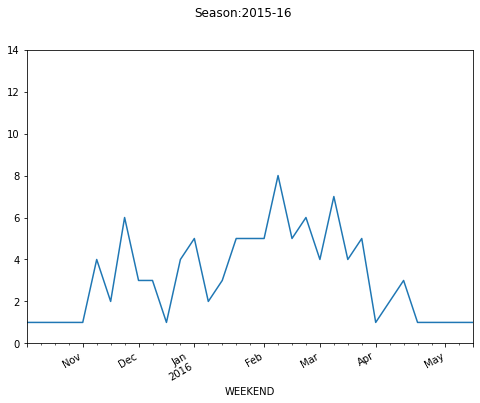

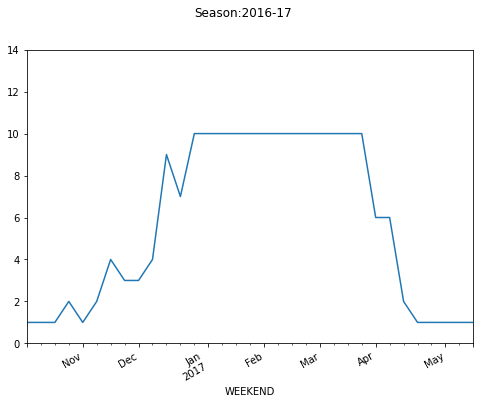

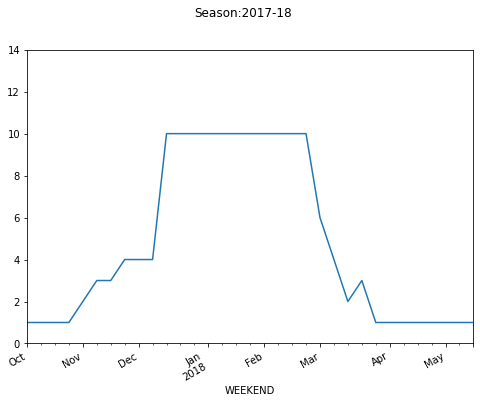

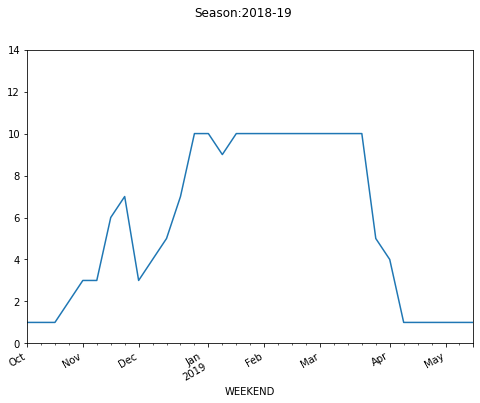

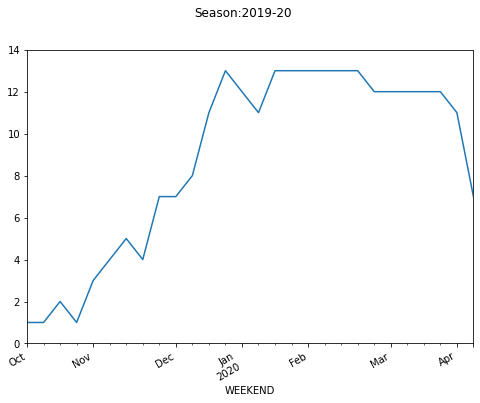

In [6]:
#Read in a very simple CSV file

file="StateDatabySeason59_58,57,56,55,54,53,52,51,50,49,48.csv"
df1=pd.read_csv(file)
df1.drop(columns=["URL", "WEBSITE"], inplace=True)
df1.WEEKEND = pd.to_datetime(df1.WEEKEND)
df1.sort_values(by=['STATENAME','SEASON', "WEEKEND"], inplace= True)
#df1.head(6)
state = "Oklahoma"
df1[(df1.STATENAME==state) & (df1.SEASON=="2019-20")].head()

df1["ACTIVITY LEVEL"] = df1["ACTIVITY LEVEL"].str[6:]
df1["ACTIVITY LEVEL"] = df1["ACTIVITY LEVEL"].astype({'ACTIVITY LEVEL': 'int32'})

season = ["2008-09",
          "2009-10",
          "2010-11",
          "2011-12",
          "2012-13",
          "2013-14",
          "2014-15",
          "2015-16",
          "2016-17",
          "2017-18",
          "2018-19",
          "2019-20"
         ]

print("CDC ILI Activity for ", state)
for s in season:
    df2 = df1[(df1.STATENAME == state) & (df1.SEASON==s) & ((df1.WEEK >=40) | (df1.WEEK <= 20))]
    df2.plot(subplots=True, x="WEEKEND", y="ACTIVITY LEVEL", ylim=(0,14),
            title=("Season:") + s, legend=False, figsize=(8,6))

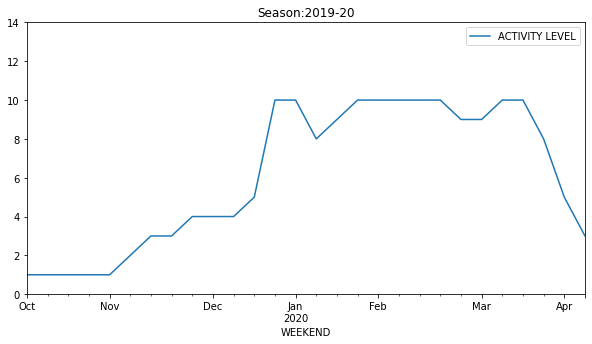

In [3]:
s = season[-1]
df1[(df1.STATENAME==state) & (df1.SEASON==s)].plot(x="WEEKEND", y="ACTIVITY LEVEL",figsize=(10,5), ylim=(0,14),
                                                     title=("Season:") + s)

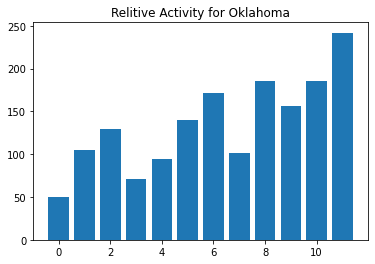

In [7]:
il = []
xax = []
cnt = 0
for s in season:
    df2 = df1[(df1.STATENAME == state) & (df1.SEASON==s) & ((df1.WEEK >=40) | (df1.WEEK <= 20))]
    il.append(np.trapz(df2['ACTIVITY LEVEL'], x=None, dx=1.0, axis=-1))
    xax.append(cnt)
    cnt += 1
    #print(il)
    
data = [23, 45, 56, 78, 213]
plt.bar(xax, il)
plt.title("Relitive Activity for " + state)
plt.show()


In [8]:
df1

,STATENAME,ACTIVITY LEVEL,ACTIVITY LEVEL LABEL,WEEKEND,WEEK,SEASON
21279,Alabama,1,Minimal,2008-10-04,40,2008-09
21529,Alabama,1,Minimal,2008-10-11,41,2008-09
21478,Alabama,1,Minimal,2008-10-18,42,2008-09
21438,Alabama,1,Minimal,2008-10-25,43,2008-09
25482,Alabama,3,Minimal,2008-11-01,44,2008-09
...,...,...,...,...,...,...
27699,Wyoming,6,Moderate,2020-03-14,11,2019-20
29916,Wyoming,10,High,2020-03-21,12,2019-20
21761,Wyoming,2,Minimal,2020-03-28,13,2019-20
23913,Wyoming,3,Minimal,2020-04-04,14,2019-20
